In [25]:
import pandas as pd
from matplotlib import pyplot as plot
data = pd.read_csv("../datasets/Ruter_data.csv", delimiter=';')
data.shape

(6000, 17)

In [31]:
# Lets grab passengers and date
pad = data[['Dato', 'Passasjerer_Ombord']]

In [32]:
# Had some trouble getting dates in proper format (ddmmyyyy), so i made sure i worked every time with this method
def format_date(date) : 
    d, m, y = map(int, date.split('/'))
    return pd.Timestamp(day=d, month=m, year=y)

In [33]:
# We calculate and insert to new coloumns
pad.insert(2, 'Day_of_Week',      [format_date(pad['Dato'][i]).dayofweek            for i in range(len(pad))], True)
pad.insert(3, 'Week',             [format_date(pad['Dato'][i]).week                 for i in range(len(pad))], True)
pad.insert(4, 'National_Holiday', [(pad['Week'][i] > 27) and (pad['Week'][i] < 31)  for i in range(len(pad))], True)
pad

,Dato,Passasjerer_Ombord,Day_of_Week,Week,National_Holiday
0,10/08/2020,5,0,33,False
1,15/08/2020,5,5,33,False
2,03/08/2020,6,0,32,False
3,27/07/2020,10,0,31,False
4,27/08/2020,10,3,35,False
...,...,...,...,...,...
5995,10/06/2020,2,2,24,False
5996,23/06/2020,2,1,26,False
5997,11/06/2020,3,3,24,False
5998,13/08/2020,5,3,33,False


Text(0, 0.5, 'Average Passengers')

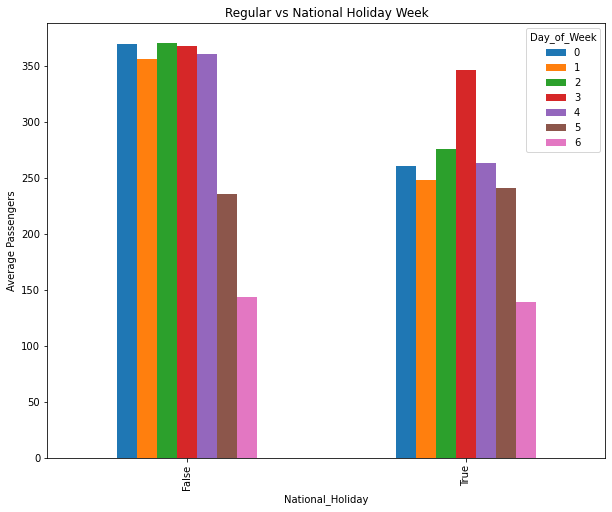

In [48]:
s = pad.groupby(by=(['Day_of_Week', 'Week', 'National_Holiday'])).sum()
pv = pd.pivot_table(s, index='National_Holiday', columns='Day_of_Week', values='Passasjerer_Ombord')
ax = pv.plot(kind='bar', figsize=(10, 8), title='Regular vs National Holiday Week')
ax.set_ylabel('Average Passengers')